In [1]:
import spacy
import en_core_web_md

In [11]:
import networkx as nx

In [4]:
with open('Harry-Potter-1.txt', 'r', encoding='utf-8') as f:
    text=f.read()[1643:]

In [5]:
nlp = en_core_web_md.load()

In [6]:
doc = nlp(text)

In [7]:
import pandas as pd

In [8]:
links = []
for sent in doc.sents:
    names = [span.text for span in sent.ents if span[0].ent_type_=='PERSON']
    for n1 in names:
        for n2 in names:
            if n1!=n2:
                links.append({
                    'source': n1 if n1<n2 else n2,
                    'target': n2 if n1<n2 else n1,
                    'weight': 1.0
                })
df_links = pd.DataFrame(links)

In [9]:
df_edges = df_links.groupby(['source','target']).weight.sum().reset_index()

In [10]:
df_edges

,source,target,weight
0,AAAARGH,Harry,2.0
1,AAAARGH,Quirrell,4.0
2,Abbott,Hannah,2.0
3,Adrian Pucey,Quaffle,2.0
4,Agrippa,Ptolemy,2.0
...,...,...,...
621,wizardin,yeh,2.0
622,wizardin,yer,2.0
623,yeh,yeh everythin,6.0
624,yeh,yer,2.0


In [12]:
g = nx.from_pandas_edgelist(df_edges, edge_attr=True)

In [16]:
g.edges(data=True)

EdgeDataView([('AAAARGH', 'Harry', {'weight': 2.0}), ('AAAARGH', 'Quirrell', {'weight': 4.0}), ('Harry', 'Alohomora', {'weight': 2.0}), ('Harry', 'Angelina', {'weight': 2.0}), ('Harry', 'Apothecary', {'weight': 2.0}), ('Harry', 'Aunt Petunia', {'weight': 24.0}), ('Harry', 'Bane', {'weight': 4.0}), ('Harry', 'Bewitch', {'weight': 2.0}), ('Harry', 'Binns', {'weight': 2.0}), ('Harry', 'Bludger', {'weight': 4.0}), ('Harry', 'Charlie', {'weight': 2.0}), ('Harry', 'Crabbe', {'weight': 10.0}), ('Harry', 'Dad', {'weight': 2.0}), ('Harry', 'Dean', {'weight': 6.0}), ('Harry', 'Devil', {'weight': 2.0}), ('Harry', 'Diagon Alley', {'weight': 4.0}), ('Harry', 'Dittany', {'weight': 2.0}), ('Harry', 'Don', {'weight': 2.0}), ('Harry', 'Doris Crockford', {'weight': 4.0}), ('Harry', 'Draco', {'weight': 2.0}), ('Harry', 'Draco Malfoy', {'weight': 2.0}), ('Harry', 'Drooble', {'weight': 2.0}), ('Harry', 'Duddy', {'weight': 2.0}), ('Harry', 'Dudley', {'weight': 62.0}), ('Harry', 'Dumbledore', {'weight': 36.0

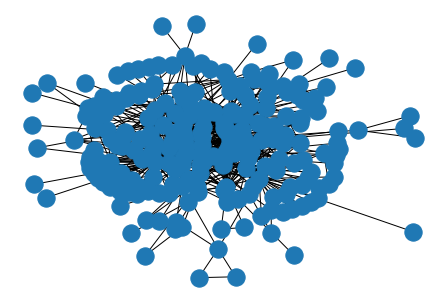

In [18]:
nx.draw_kamada_kawai(g)

In [19]:
nx.betweenness_centrality(g)

{'AAAARGH': 0.0,
 'Harry': 0.48841950275326534,
 'Quirrell': 0.015399578100591496,
 'Abbott': 0.0,
 'Hannah': 0.016732359533194217,
 'Adrian Pucey': 0.0,
 'Quaffle': 0.022893584933668033,
 'Agrippa': 0.0,
 'Ptolemy': 0.0,
 'Alberic Grunnion': 0.0,
 'Dumbledore': 0.10360425877479704,
 'Hengist': 0.0,
 'Merlin': 0.0,
 'Morgana': 0.0,
 'Paracelsus': 0.0,
 'Albus': 0.0,
 'James': 0.0,
 'Lily': 0.019638322322069128,
 'Albus Dumbled': 0.0,
 'Hogwarts': 0.03059386641072786,
 'Alicia Spinnet': 0.0,
 'Johnson': 0.004511478300753512,
 'Oliver Wood': 0.004654290742689708,
 'Alohomora': 0.0,
 'Alohomora Charm': 0.0,
 'Hermione': 0.027992091645331316,
 'Angelina': 0.0,
 'Angelina Johnson': 0.0,
 'Gryffindor': 0.013991559507725423,
 'Apothecary': 0.0,
 'Hagrid': 0.13583575606306006,
 'Aunt Petunia': 0.009006102505406932,
 'Dudley': 0.06600164473348653,
 'Dursleys': 0.01385495170636597,
 'Figg': 0.00023443336682381428,
 'Hedwig': 0.0002919682956780105,
 'Ickle Dudleykins': 0.0,
 'Marge': 0.0,
 'Uncle

In [21]:
g.remove_nodes_from(node for node,score in nx.betweenness_centrality(g).items() if score<0.01)

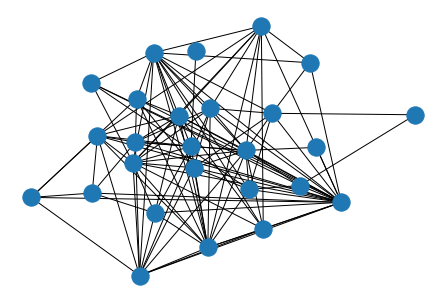

In [22]:
nx.draw_kamada_kawai(g)

In [23]:
import matplotlib.pyplot as plt

In [24]:
import numpy as np

In [28]:
edge_weight = np.array([wt['weight'] for _,_,wt in g.edges(data=True)])
edge_weight = 10.0 * edge_weight / edge_weight.max()

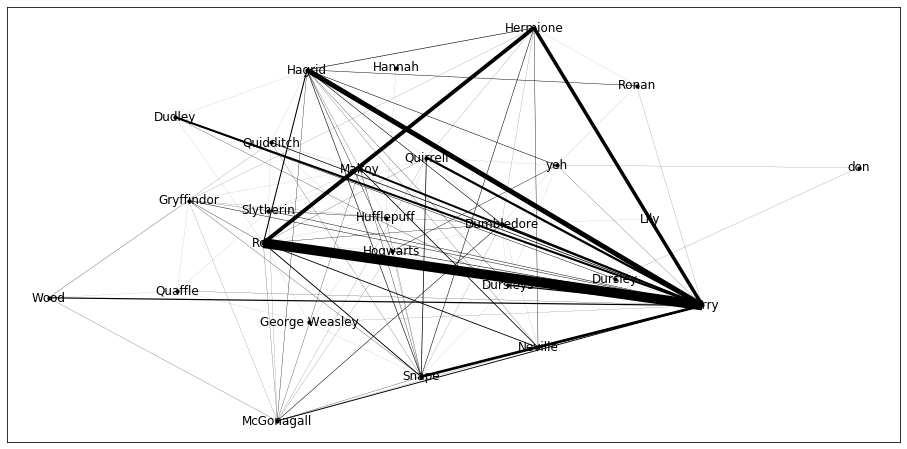

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
xy = nx.kamada_kawai_layout(g)
opts = {'with_labels':True, 'node_size':10, 'node_color':'k'}
nx.draw_networkx(g, ax=ax, pos=xy, width=edge_weight, **opts)
plt.show()